### COVID DATA AND LOCKDOWN DATES ANALYSIS

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt

In [2]:
lockdown_data = pd.read_csv('lockdown_us.csv', parse_dates=['Date'], dayfirst=True)

covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'])


In [3]:
covid_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485


In [4]:
lockdown_data

,Country,State,County,Date,Type
0,United States,Alabama,NaN,2020-04-04,Stay at home
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place
2,United States,Alaska,NaN,2020-03-28,Stay at home
3,United States,Arizona,NaN,2020-03-31,Stay at home
4,United States,California,NaN,2020-03-19,Stay at home
...,...,...,...,...,...
168,United States,Virginia,NaN,2020-03-30,Stay at home
169,United States,Washington,NaN,2020-03-23,Stay at home
170,United States,West Virginia,NaN,2020-03-24,Stay at home
171,United States,Wisconsin,NaN,2020-03-25,Stay at home


In [5]:
lockdown_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  173 non-null    object
 1   State    173 non-null    object
 2   County   129 non-null    object
 3   Date     173 non-null    object
 4   Type     173 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB


<Figure size 800x800 with 0 Axes>

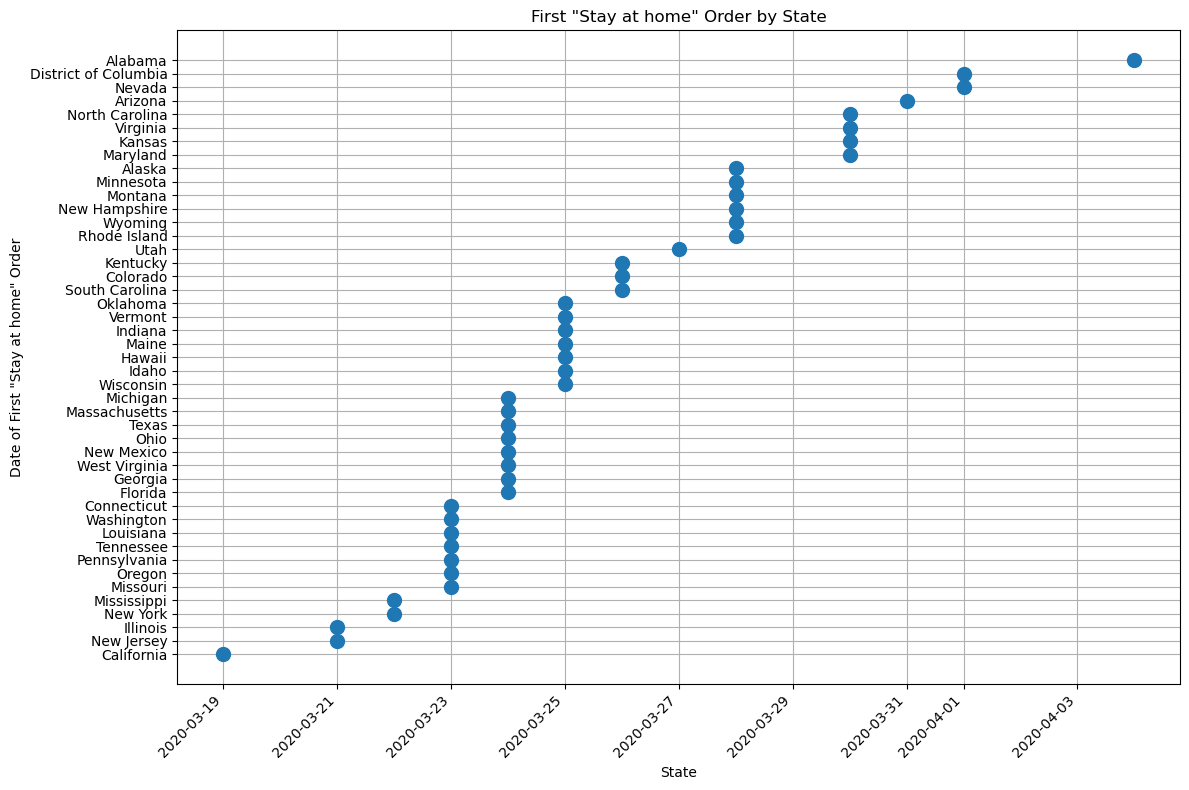

In [14]:
import matplotlib.pyplot as plt
lockdown_data['Date'] = pd.to_datetime(lockdown_data['Date'])
stay_at_home_orders = lockdown_data[lockdown_data['Type'] == 'Stay at home']

first_orders = stay_at_home_orders.groupby('State')['Date'].min().reset_index()

first_orders = first_orders.sort_values('Date')

plt.figure(figsize=(8, 8))
plt.figure(figsize=(12, 8))
plt.plot(first_orders['Date'], first_orders['State'], marker='o', linestyle='', markersize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Date of First "Stay at home" Order')
plt.title('First "Stay at home" Order by State')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

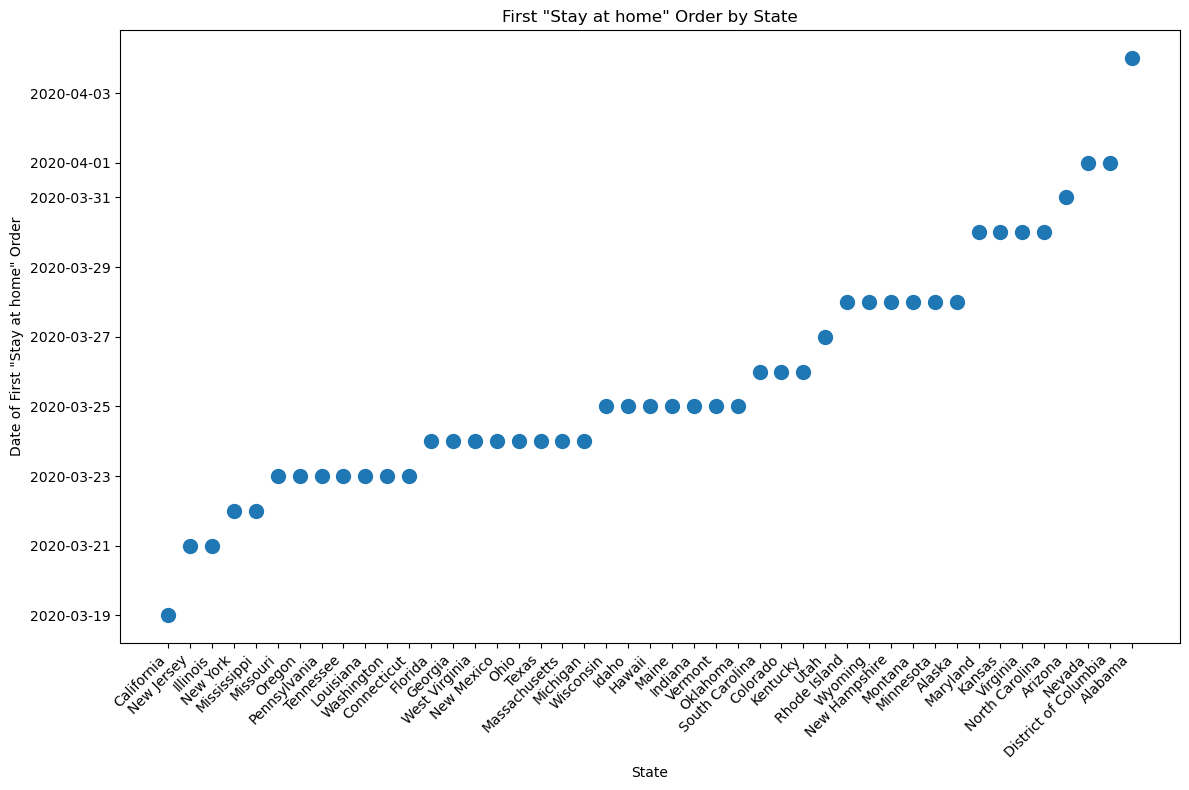

In [7]:
import matplotlib.pyplot as plt
lockdown_data['Date'] = pd.to_datetime(lockdown_data['Date'])
stay_at_home_orders = lockdown_data[lockdown_data['Type'] == 'Stay at home']

first_orders = stay_at_home_orders.groupby('State')['Date'].min().reset_index()

first_orders = first_orders.sort_values('Date')

plt.figure(figsize=(8, 8))
plt.figure(figsize=(12, 8))
plt.plot(first_orders['State'],first_orders['Date'], marker='o', linestyle='', markersize=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Date of First "Stay at home" Order')
plt.title('First "Stay at home" Order by State')
plt.grid(False)
plt.tight_layout()
plt.show()

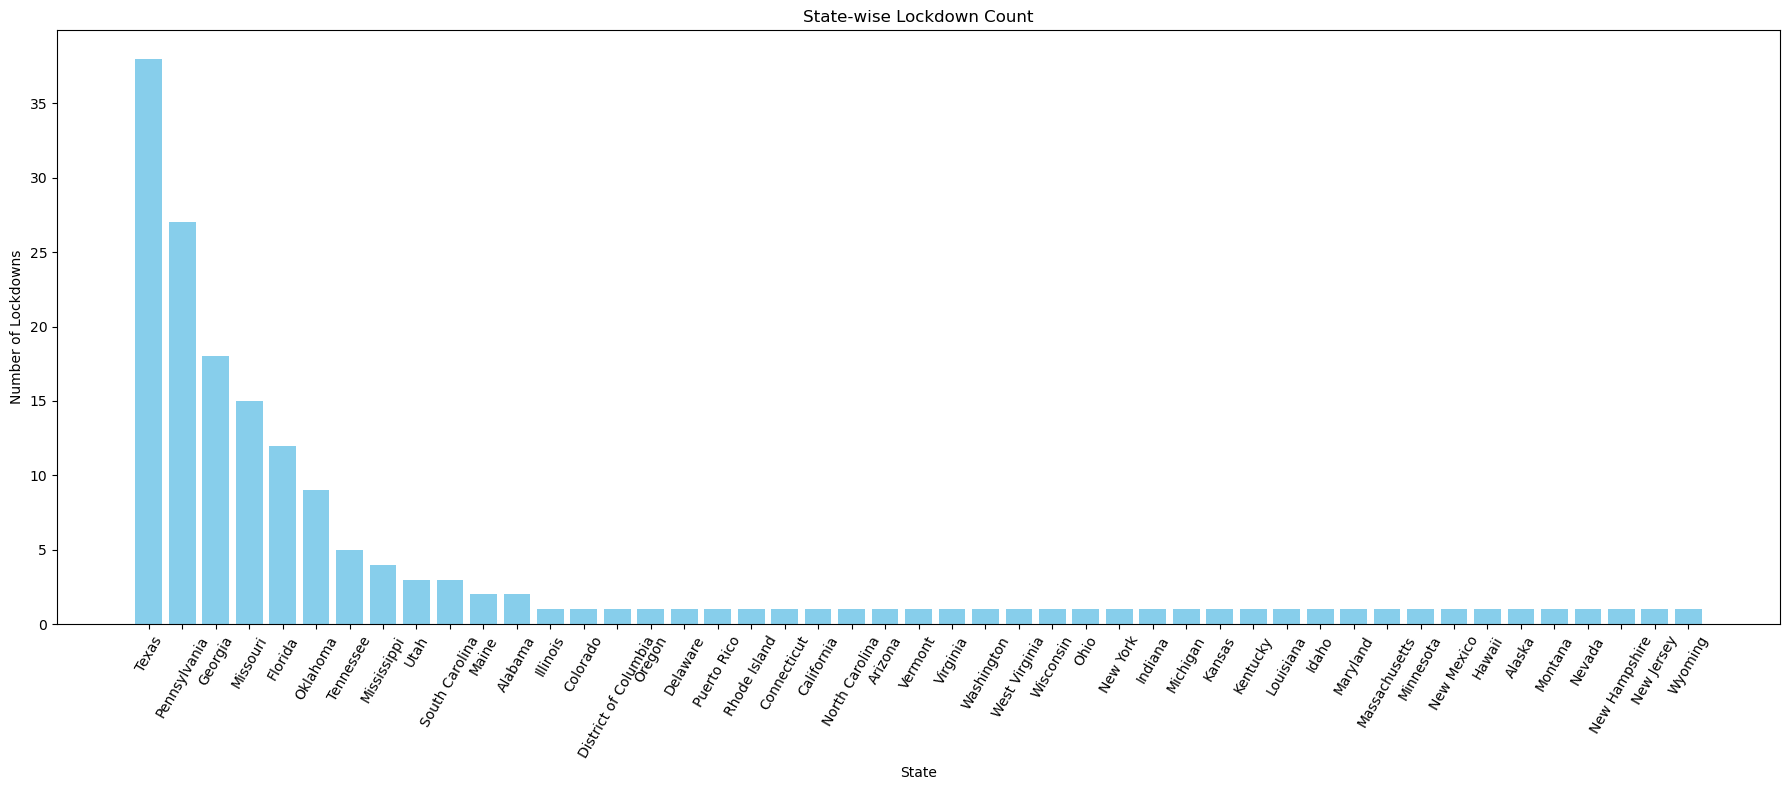

In [8]:
from matplotlib import pyplot as plt
state_lockdown_count = lockdown_data.groupby('State')['Date'].count().reset_index()

state_lockdown_count = state_lockdown_count.sort_values(by='Date', ascending=False)

plt.figure(figsize=(18, 8))
plt.bar(state_lockdown_count['State'], state_lockdown_count['Date'], color='skyblue')
plt.xticks(rotation=60)
plt.xlabel('State')
plt.ylabel('Number of Lockdowns')
plt.title('State-wise Lockdown Count')
plt.tight_layout()
plt.show()

In [9]:
# !pip install dash pandas plotly

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('cases ~ C(state)', data=covid_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(state),6.824638e+16,55.0,1169.808012,0.0
Residual,6.564396e+16,61886.0,NaN,NaN


In [11]:
#OBSERVATIONS:
#The sum of squares column indicates that a significant amount of variation in COVID-19 cases is associated with differences between states. 
#It means the case counts vary significantly from state to state. The F statistic of 1169.808012 is very high, which implies that the variation in 
#COVID-19 case counts between states is much greater than what would be expected due to random chance within each state. 
#The p-value, for states is 0.0, indicating that the differences in COVID-19 case counts between states are statistically significant. 
#From the results, we can interpret that state-level factors are likely influencing the number of COVID-19 cases. It's crucial to highlight that, 
#while ANOVA can tell us that at least one state has a significantly different mean number of cases from the others, it doesn't indicate which 
#specific states are different or the nature of those differences.

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('deaths ~ C(state)', data=covid_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(state),1.201148e+13,55.0,2040.023502,0.0
Residual,6.625078e+12,61886.0,NaN,NaN


In [13]:
# OBSERVATIONS
#ANOVA table for deaths suggests a similar analysis and interpretation as for cases, suggesting that there is a considerable variation in the 
#number of deaths due to COVID-19 among the states. This analysis for deaths shows that there are statistically significant differences in 
#the mean number of deaths between states. 